In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
from astropy import constants as const
from astropy import units as u
import math
from astropy.constants import c, L_sun, sigma_sb, M_jup, M_earth
from pyLIMA import event
from pyLIMA import telescopes
from pyLIMA.models import USBL_model
from pyLIMA.models import PSBL_model
from collections import OrderedDict


tstart_Roman = 2461508.763828608
m_planet = 1* u.M_earth
m_star = 1* u.M_sun
q = (m_planet/m_star).decompose()
ml = (m_star+m_planet).decompose().to('M_sun')
DS = 8000 * u.pc
DL = 4000 * u.pc
c = const.c
G = const.G
yr2day = 365.25
pi_rel = ((1 / DL) - (1 / DS))
k = 4 * G / (c ** 2)
aconv = (180 * 60 * 60 * 1000) / math.pi
theta_E = (np.sqrt(k * pi_rel * ml).decompose()*u.rad).to('mas')
mu_rel = 5*u.mas/u.year
tE = (theta_E/mu_rel).to('day')
piE = pi_rel.value/theta_E
Rstar = 10*u.R_sun
theta_s = np.arctan(Rstar/DS).decompose().to('mas')
u0 = 2/3
rho = theta_s/theta_E
phi = np.random.uniform(0, np.pi)
piEE = piE * np.cos(phi)
piEN = piE * np.sin(phi)
d = 1
s = (np.arctan(d*u.au/DL).to('mas'))/theta_E
t0 = tstart_Roman+2*365.25

print(rho)
print(tE)
print(piE)
print(s)
print(piEE)
print(piEN)
print(t0)

/home/anibal-pc/anaconda3/envs/pyLIMA/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


0.005761505427078632
73.703964552529 d
0.00012389089318922777 1 / mas
0.24778178637845552
0.00011852243741783865 1 / mas
3.607471751461355e-05 1 / mas
2462239.263828608


OrderedDict([('t0', 2462239.263828608), ('u0', 0.3), ('tE', 100), ('rho', 0.001), ('separation', 0.1), ('mass_ratio', 0.000125), ('alpha', 2), ('fsource_Simulation', None), ('fblend_Simulation', None), ('v_para', 1000), ('v_perp', 600), ('v_radial', 600)])


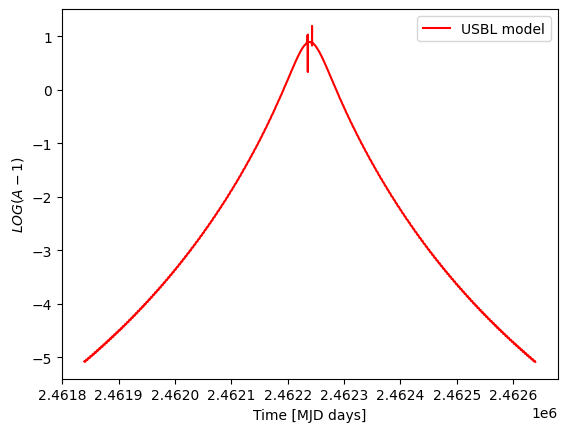

In [13]:

simulated_event = event.Event(ra = 170, dec=-70)
simulated_event.name = 'Simulated'   

u0=0.3
tE=100
rho=0.001
s=0.1
q=1.25e-4
alpha=2
v_para = 1000
v_perp = 600
v_radial = 600



time_sim = np.linspace(t0-4*tE,t0+4*tE,50000)      
lightcurve_sim = np.c_[time_sim,[19.] * len(time_sim),[0.01] * len(time_sim)]

telescope = telescopes.Telescope(name='Simulation',
                                 camera_filter='I',
                                 lightcurve = lightcurve_sim.astype(float),
                                 lightcurve_names = ['time','mag','err_mag'],
                                 lightcurve_units = ['JD','mag','err_mag'],
                                     )

simulated_event.telescopes.append(telescope)

usbl = USBL_model.USBLmodel(simulated_event, parallax=['None',0], orbital_motion=['2D', t0])

# Initialize the OrderedDict
pyLIMA_parameters = OrderedDict([
    ('t0', t0),
    ('u0', u0),
    ('tE', tE),
    ('rho', rho),
    ('separation', s),
    ('mass_ratio', q),
    ('alpha', alpha),
    ('fsource_Simulation', None),
    ('fblend_Simulation', None)
])
pyLIMA_parameters['v_para'] = v_para
pyLIMA_parameters['v_perp'] = v_perp
pyLIMA_parameters['v_radial'] = v_radial

print(pyLIMA_parameters)

magnification = usbl.model_magnification(telescope, pyLIMA_parameters)
magnification
log_magnification = np.log(magnification-1)
# %matplotlib widget
plt.plot(time_sim,log_magnification,"r",label="USBL model")
# plt.xlim(t0-tE,t0+tE)

plt.xlabel("Time [MJD days]")
plt.ylabel("$LOG(A-1)$")
plt.legend()
plt.show()       
plt.close()

In [14]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import HoverTool


p = figure(
    title="USBL Model",
    x_axis_label="Time [MJD days]",
    y_axis_label="LOG(A-1)",
    x_range=(t0 - tE, t0 + tE),
    tools="pan,box_zoom,reset,save"
)

# Add the plot
p.line(time_sim, log_magnification, color="red", legend_label="USBL model", line_width=2)

# Add hover tool for interactivity
hover = HoverTool(
    tooltips=[("Time", "@x"), ("LOG(A-1)", "@y")],
    mode='vline'
)
p.add_tools(hover)

# Customize legend and layout
p.legend.location = "top_left"
p.legend.click_policy = "hide"

# Show the plot
show(p)

3.003489348850793e-06
1.00895228682449 mas
73.703964552529 d
0.00012389089318922777 1 / mas
0.24778178637845552
